In [2]:
def section(text):
    print('\033[1m{}\033[0m'.format(text))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
section('Basic manipulations')
print('1D Array')
array = np.array([0.5,1.5,2.5,3.5,4.5, 5.5, 6.5, 7.5, 8.5, 9.5])
print('Simplest initialization', array)
print('Attribue', array.shape, array.dtype)

array = np.array([0.5,1.5,2.5,3.5,4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
                 dtype=np.int16)
print('Changing data type', array)
print('Attribue', array.shape, array.dtype)

print('Indexing', array[4], array[5])
print('Slicing 1', array[4:7], array[:3], array[7:])
print('Slicing 2', array[-1], array[:5:-1], array[1::2])

Basic manipulations
1D Array
Simplest initialization [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
Attribue (10,) float64
Changing data type [0 1 2 3 4 5 6 7 8 9]
Attribue (10,) int16
Indexing 4 5
Slicing 1 [4 5 6] [0 1 2] [7 8 9]
Slicing 2 9 [9 8 7 6] [1 3 5 7 9]


In [5]:
section('Basic operation')
array = np.ones((10,))
print('ones', array)
array[0:5] = 0.5
print('modified', array)
array = array*3 + 7
print('multiply', array)

print('random', np.random.random((5,)))
print('arange', np.arange(5))
print('arange', np.linspace(10, 25, 4))

Basic operation
ones [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
modified [0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1.  1. ]
multiply [ 8.5  8.5  8.5  8.5  8.5 10.  10.  10.  10.  10. ]
random [0.85158415 0.41192805 0.87582097 0.07236214 0.82809069]
arange [0 1 2 3 4]
arange [10. 15. 20. 25.]


Plotting 1D data


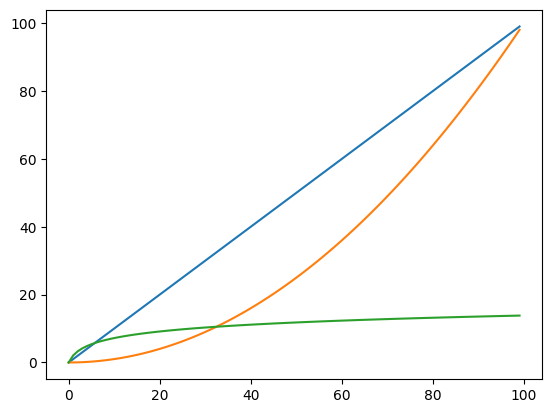

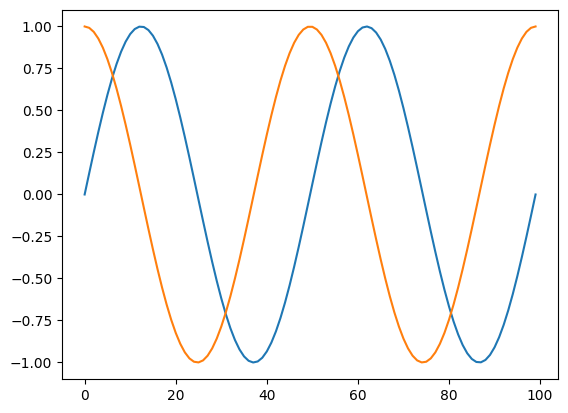

In [9]:
section('Plotting 1D data')

x = np.arange(100)
y = np.arange(100)
plt.plot(x,y)
plt.plot(x,(0.1*y)**2)
plt.plot(x, np.log((y+1)**3))
plt.show()

y = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x,np.sin(y))
plt.plot(x,np.cos(y))
plt.show()

In [10]:
section('2D manipulations')
print('2D Array')
array = np.array([[1,2,3], [4,5,6], [7,8,9]])
print('Initialization')
print(array)

print('Attribue', array.shape, array.dtype)
print('Indexing', array[2, :], array[:, 2])

2D manipulations
2D Array
Initialization
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Attribue (3, 3) int64
Indexing [7 8 9] [3 6 9]


In [11]:
section('2D operations')
identity = np.eye(3)*2

print('identity (2x)')
print(identity)

array_1 = np.arange(1,4)
array_2 = np.array([2,2,2])
print('array_1', array_1)
print('array_2', array_2)

print(np.dot(array, identity), array_1*array_2,
      np.all(np.equal(np.dot(array, identity), array_1*array_2)))


2D operations
identity (2x)
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
array_1 [1 2 3]
array_2 [2 2 2]
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]] [2 4 6] False


Plotting 2D data


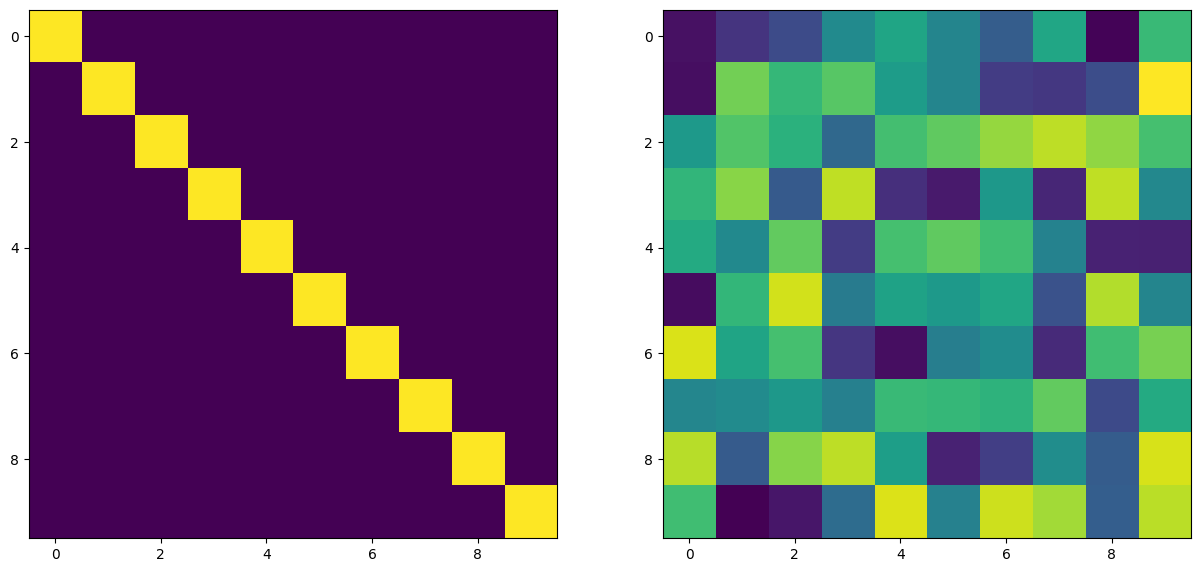

In [12]:
section('Plotting 2D data')
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].imshow(np.eye(10))
axs[1].imshow(np.random.random((10,10)))
plt.show()

Contrast
0 min 0.0047135507111326636 max 0.9975372111300082 avg 0.4483106777026933 std 0.3052492626490378
1 min 0.0047135507111326636 max 1.053590394077137 avg 0.4583106777026933 std 0.30851694714435074
2 min 0.0047135507111326636 max 3.053590394077137 avg 0.4783106777026933 std 0.3982384905182419
3 min 0.0047135507111326636 max 6.053590394077137 avg 0.5083106777026933 std 0.6342008185998458
4 min 0.0047135507111326636 max 10.053590394077137 avg 0.5483106777026933 std 1.002114292694536


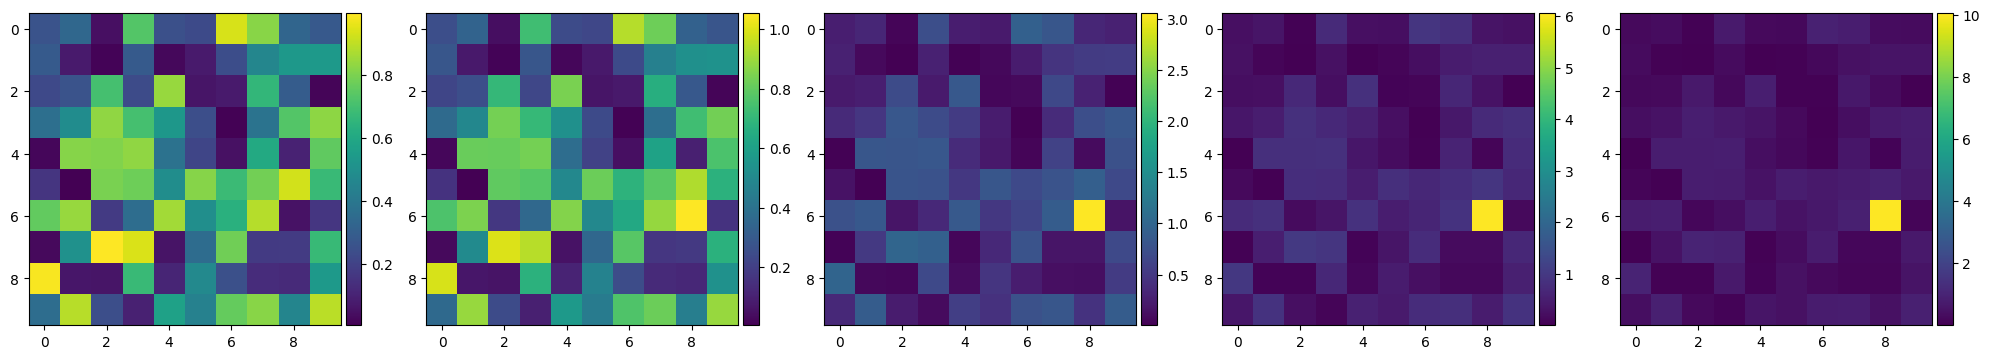

In [14]:
section('Contrast')
# Matplotlib automatically determines the contrast based on MIN/MAX
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
array = np.random.random((10,10))
for i, ax in enumerate(axs):
    array[6,8] += 1*i
    print(i, 'min', np.min(array), 'max', np.max(array), 'avg', np.average(array), 'std', np.std(array))
    im = ax.imshow(array)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
fig.tight_layout()
plt.show()

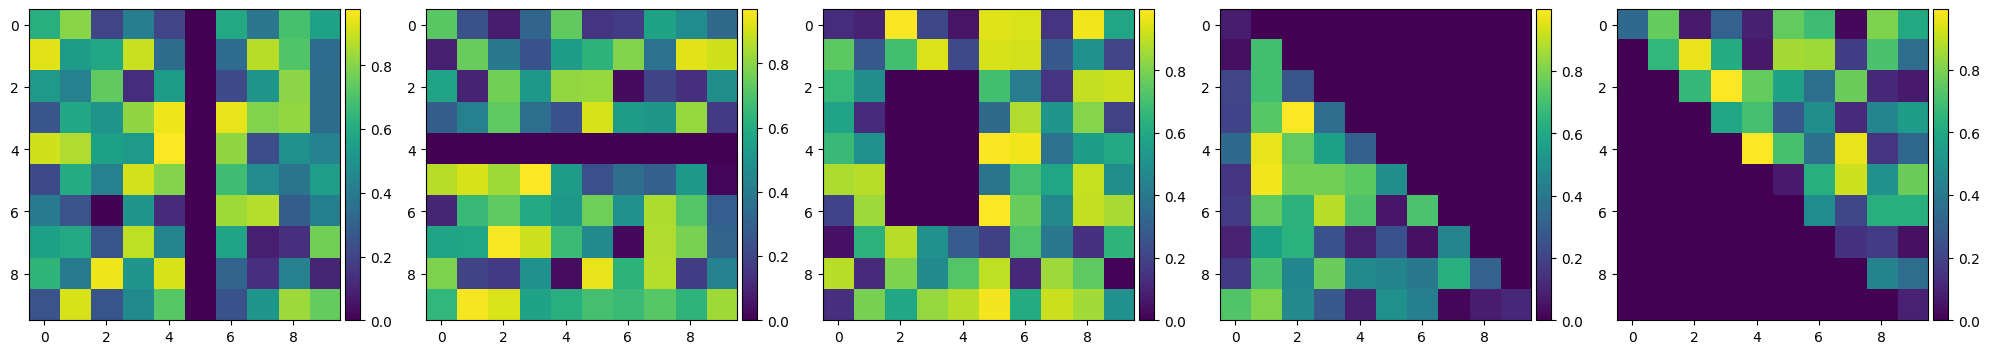

In [19]:
section('Masking')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
array = np.random.random((5, 10,10))
array[0, :, 5] = 0
array[1, 4, :] = 0
array[2, 2:7, 2:5] = 0
array[3, :, :] = np.tril(array[3, :, :])
array[4, :, :] = np.triu(array[4, :, :])
for i, ax in enumerate(axs):
    im = ax.imshow(array[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
fig.tight_layout()
plt.show()

Thresholding


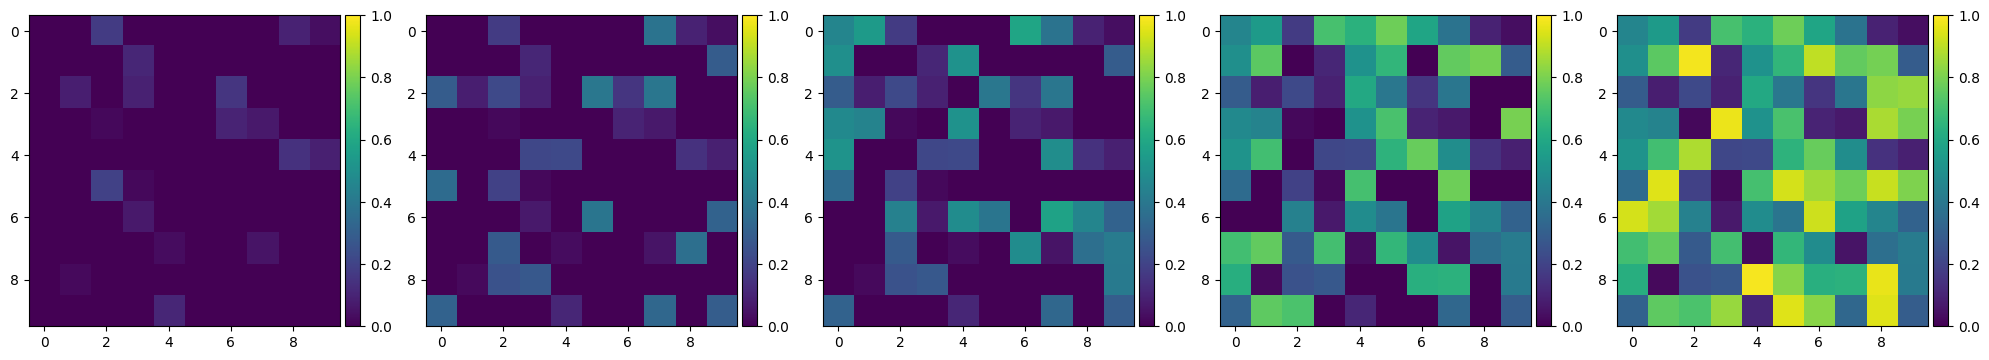

In [15]:
section('Thresholding')
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
array = np.random.random((10,10))

for i, ax in enumerate(axs):
    tmp = array.copy()
    tmp[array > 0.2*(i+1)] = 0
    im = ax.imshow(tmp, vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
fig.tight_layout()
plt.show()